In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_reader import *

# Helper functions

In [16]:
def mask_my_image(img, x_slice=slice(0,15), y_slice=slice(0,28)):
    masked_image = img.copy()
    masked_image[x_slice, y_slice] = 0
    return masked_image
#This method inverse and normalise the gry scale
def inv_gray(img):
    return 1.0 - img/256.0

# Gray-scales Samples

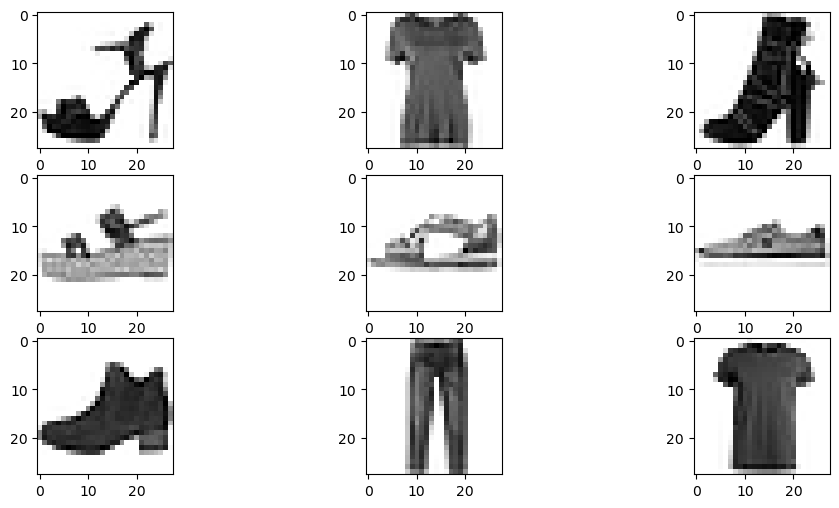

In [17]:
fig = plt.figure(figsize=(12,6))
for i, img in enumerate(get_images(9)):
    plt.subplot(3,3,i+1)
    plt.imshow(inv_gray(img), cmap='gray');
plt.show()

# Third Version: Continuous inputs 
### Paper: [Link](https://arxiv.org/abs/2007.13505)
### Blog: [Link](https://ml-jku.github.io/hopfield-layers/)
### Update rule
##  $\boldsymbol{\zeta^{new}} = \boldsymbol{X}^T softmax(\beta \boldsymbol{X} \boldsymbol{\zeta} )$


In [19]:
from scipy.special import softmax

def query(img, data_matrix, beta=1.0):
    # 1D masked image
    masked_image_1D = img.flatten()
    # tarnsform the image by data_matrix
    trans_img = np.matmul(data_matrix, masked_image_1D)
    # take the scaled softmax. Beta (or inverse of temperature) is the scaling factor
    wieghted_img= softmax(beta*trans_img)
    # retrieve the image
    retrieved_image_1D = np.matmul(data_matrix.T, wieghted_img)
    return retrieved_image_1D.reshape((28, 28))

# Low temperature $\beta=.1$

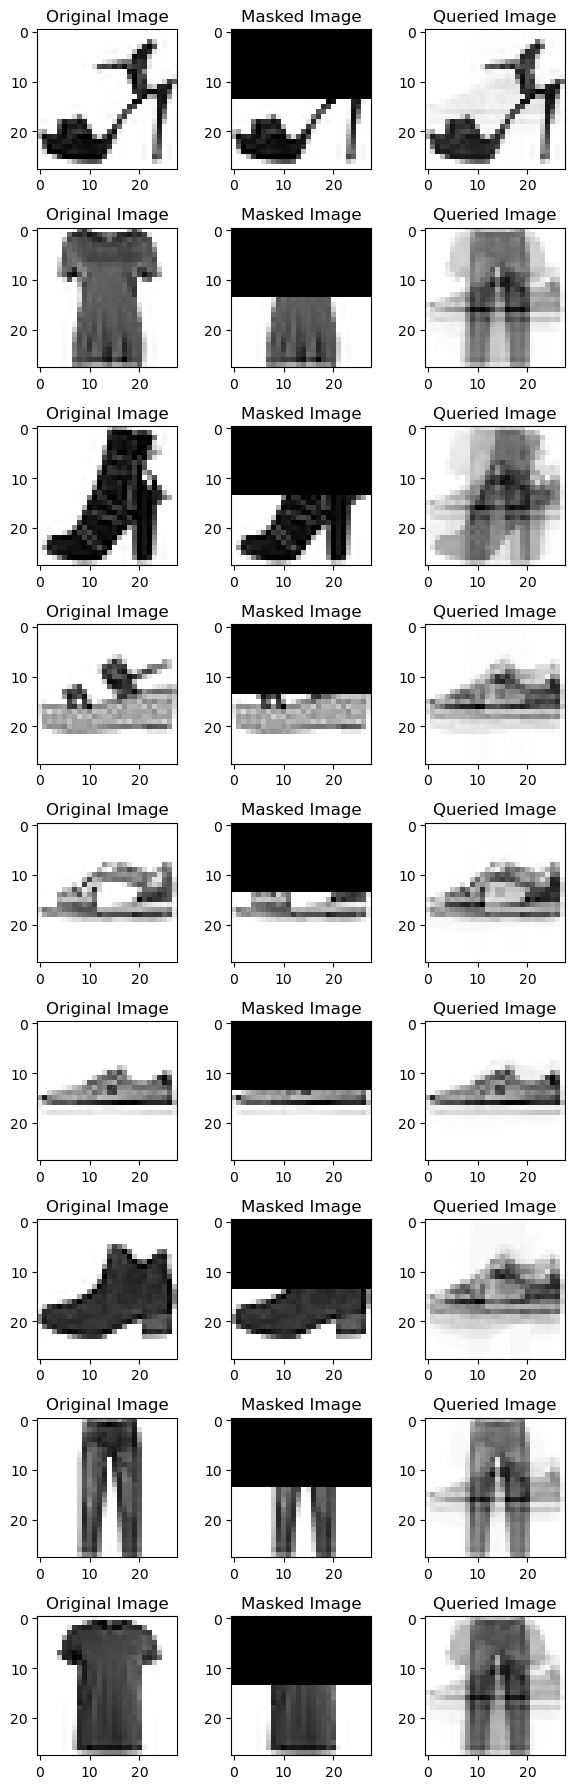

In [28]:
size=9
fig = plt.figure(figsize=(6,size*2))
index = 1
size=9
images = get_images(size)
data_matrix = np.array([inv_gray(m).flatten() for m in images])

for img in images:
    # normalise the images
    img = inv_gray(img)
    plt.subplot(size,3,index);plt.title("Original Image")    
    plt.imshow(img, cmap='gray')
    #
    plt.subplot(size,3,index+1);plt.title("Masked Image")        
    masked_img = mask_my_image(img, slice(0, 14))
    plt.imshow(masked_img, cmap='gray')
    #
    plt.subplot(size,3,index+2);plt.title("Queried Image")    
    retrieved_img = query(masked_img, data_matrix, beta=.1)
    plt.imshow(retrieved_img, cmap='gray')
    index += 3

plt.tight_layout();plt.show()

# High temperature $\beta=10$

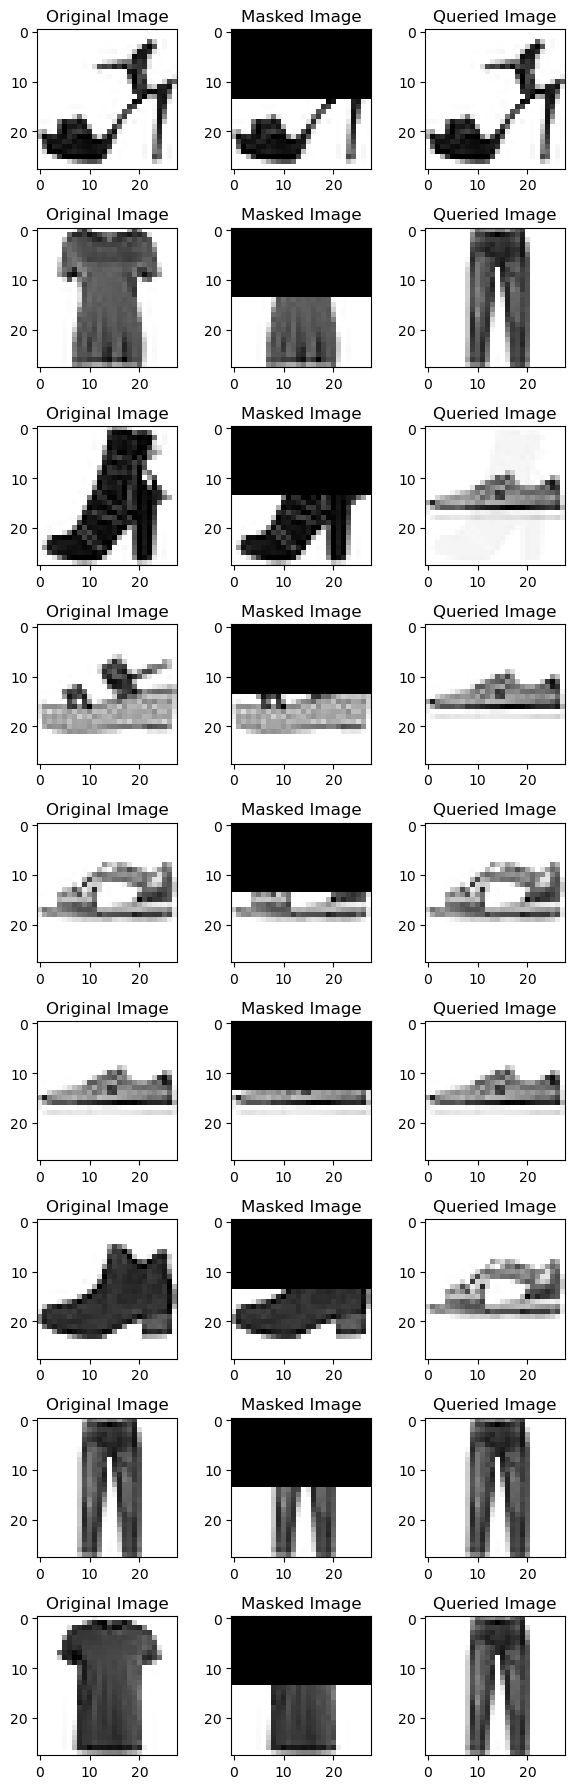

In [25]:
size=9
fig = plt.figure(figsize=(6,size*2))
index = 1
size=9
images = get_images(size)
data_matrix = np.array([inv_gray(m).flatten() for m in images])

for img in images:
    # normalise the images
    img = inv_gray(img)
    plt.subplot(size,3,index);plt.title("Original Image")    
    plt.imshow(img, cmap='gray')
    #
    plt.subplot(size,3,index+1);plt.title("Masked Image")        
    masked_img = mask_my_image(img, slice(0, 14))
    plt.imshow(masked_img, cmap='gray')
    #
    plt.subplot(size,3,index+2);plt.title("Queried Image")    
    retrieved_img = query(masked_img, data_matrix, beta=10)
    plt.imshow(retrieved_img, cmap='gray')
    index += 3

plt.tight_layout();plt.show()